#### Задача 4.3

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

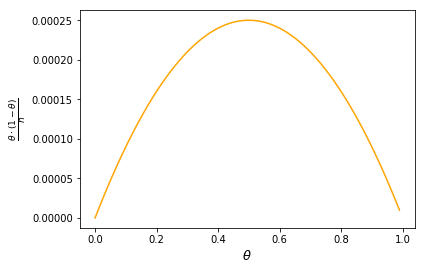

In [29]:
N = 1000

theta = 0
step = 0.01 #шаг

# набор нижних оценок дисперсии из неравенства Рао-Крамера
low_est = np.zeros(100)
#для соответствующих параметров theta
theta_val = np.zeros(100)

i = 0
while theta <= 1:
    low_est[i] = theta * (1 - theta) / N
    theta_val[i] = theta
    theta += step
    i = i + 1

plt.figure()  
plt.ylabel("$\\frac{\\theta \cdot (1 - \\theta)}{n}$", fontsize=13)
plt.xlabel("$\\theta$", fontsize=13)
plt.plot(theta_val, low_est, color='orange')
plt.show()

In [30]:
#здесь должен быть вывод

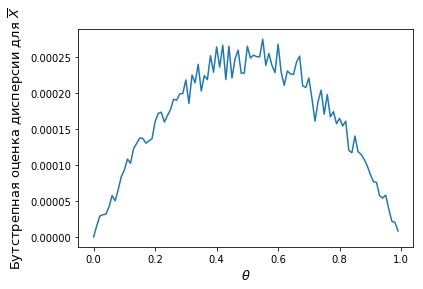

In [31]:
K = 500  # Число бутстрепных выборок

#бутстрепные оценок дисперсии
var_but_est =  np.zeros(100)

i = 0
for theta in theta_val:
    #выборка
    tmp_sample = sps.bernoulli.rvs(theta, size=N)
    #оценка
    effective_est = tmp_sample.mean()
    
    tmp_est = np.zeros(K)
    
    for j in range(0, K):
        #параметрическая бутстрепная выборка
        sample_but = sps.bernoulli.rvs(effective_est, size=N)
        #оценка для нее
        tmp_est[j] = sample_but.mean()
    var_but_est[i] = tmp_est.var()
    i = i + 1
    

plt.figure()
plt.ylabel("Бутстрепная оценка дисперсии для $\overline{X}$", fontsize=13)
plt.xlabel("$\\theta$", fontsize=13)
plt.plot(theta_val, var_but_est)
plt.show()

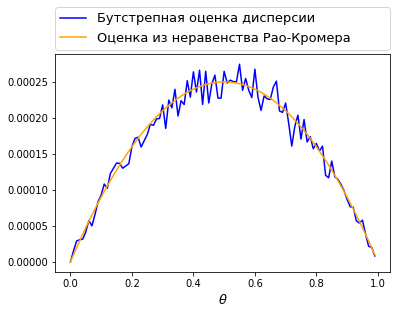

In [32]:
plt.figure()
plt.plot(theta_val, var_but_est, color='blue', 
         label="Бутстрепная оценка дисперсии")
plt.plot(theta_val, low_est, color='orange',
     label="Оценка из неравенства Рао-Кромера")
plt.xlabel("$\\theta$", fontsize=13)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()